# Dementia Exploratory Data Analysis (EDA)

In [69]:
import os, glob, shutil, json
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import losses, optimizers, metrics
from tensorflow.keras import Input, Model, models, layers, callbacks, regularizers
from scipy import ndimage
from jarvis.train import custom, datasets, params
from jarvis.train.client import Client
from jarvis.utils.general import gpus, overload, tools as jtools
from jarvis.utils.db import DB
from jarvis.utils import datasets, io, arrays as jars
from jarvis.utils.display import imshow

In [79]:
# --- Prepare client
client = Client('/data/raw/adni/data/ymls/client-3d-raw.yml', configs={'batch': {'size': 4, 'fold': 0}})
gen_train, gen_valid = client.create_generators()

(4, 96, 160, 160, 1) {}


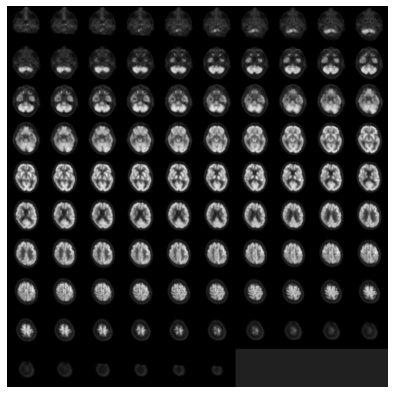

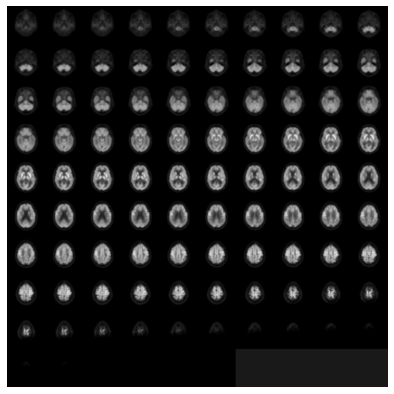

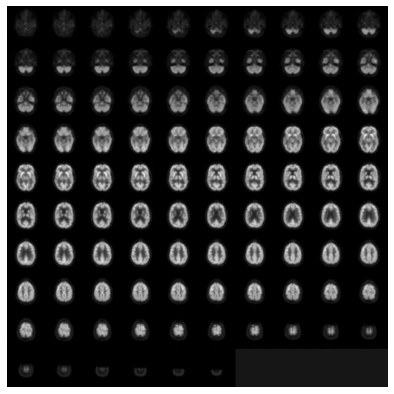

In [80]:
for x, y in gen_train:
    print(x['dat'].shape, y)
    imshow(x['dat'][0])
    imshow(x['dat'][1])
    imshow(x['dat'][2])
    break

In [78]:
print(x['dat'].max(), x['dat'].min())

5.6345925 -0.8375178
